# Demonstrating the Wolfson Bipolarization Coefficient:


-------------------------

### 1. Imports & Input Data

In [1]:
from inequality.wolfson import wolfson


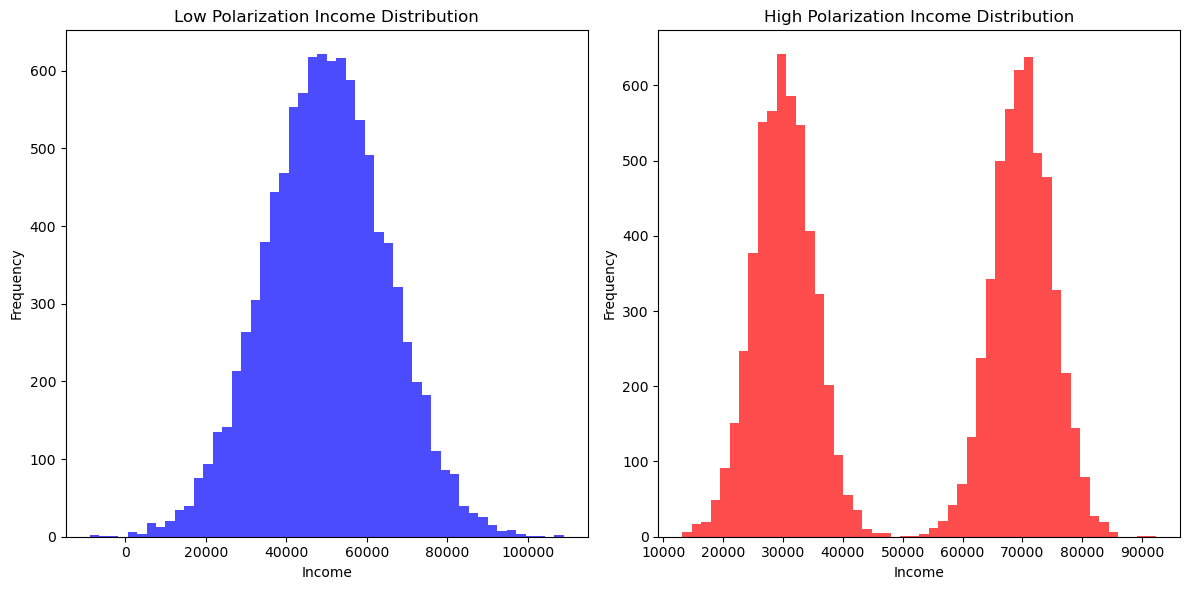

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Distribution 1: Low polarization (normal distribution)
income_low_polarization = np.random.normal(loc=50000, scale=15000, size=10000)

# Distribution 2: High polarization (bimodal distribution)
income_high_polarization = np.concatenate([
    np.random.normal(loc=30000, scale=5000, size=5000),
    np.random.normal(loc=70000, scale=5000, size=5000)
])

# Plotting the distributions
plt.figure(figsize=(12, 6))

# Plot for low polarization
plt.subplot(1, 2, 1)
plt.hist(income_low_polarization, bins=50, color='blue', alpha=0.7)
plt.title('Low Polarization Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')

# Plot for high polarization
plt.subplot(1, 2, 2)
plt.hist(income_high_polarization, bins=50, color='red', alpha=0.7)
plt.title('High Polarization Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')

# Show plots
plt.tight_layout()
plt.show()


In [3]:
wolfson(income_high_polarization)

np.float64(0.17571224182763848)

In [4]:
wolfson(income_low_polarization)

np.float64(0.07016937981819878)